In [133]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from utils import *
from placecell import PlaceNetwork

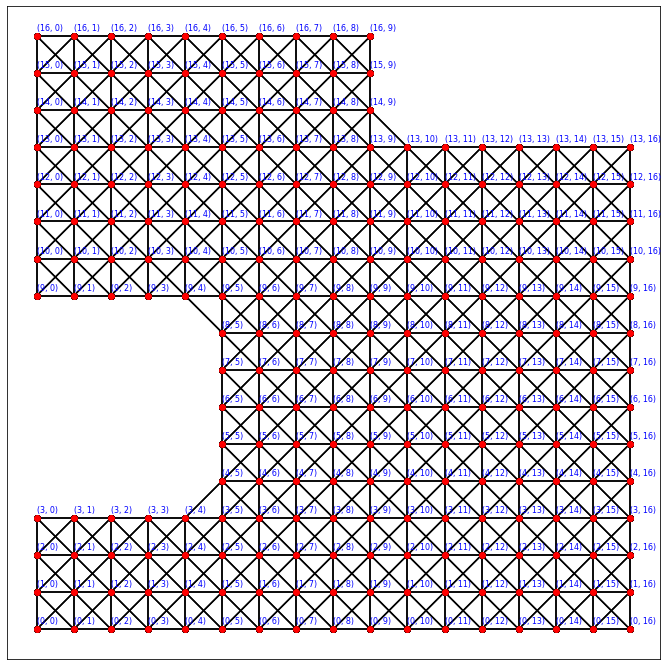

In [134]:
network = PlaceNetwork()
data = loadNetwork("test_9")
network.loadFromFile(data)
network.plotCells()
plt.show()

In [142]:
def getAvgWgt(network, cell, costmap):
    avg = 0
    for connected in cell.wgts.keys():
        avg += network.cells[connected].wgts[cell.ID][costmap]
    return avg / len(cell.wgts.keys())

In [156]:
G = nx.DiGraph()

#Set up edges and nodes
for cell in network.cells:
    G.add_node(cell.ID,pos=(network.points[cell.ID][1], network.points[cell.ID][0]),  weight=getAvgWgt(network, cell, 0))
    
for cell in network.cells:
    for connected in cell.wgts.keys():
        G.add_edge(cell.ID, connected)
edges = G.edges()
pos = nx.get_node_attributes(G,'pos')

#Edge colors
color_data = list(G.nodes(data="weight", default=1))
node_colors = []
for i in color_data:
    node_colors.append(i[1])
cmap = plt.cm.inferno

csmin = min(node_colors)
csmax = max(node_colors)

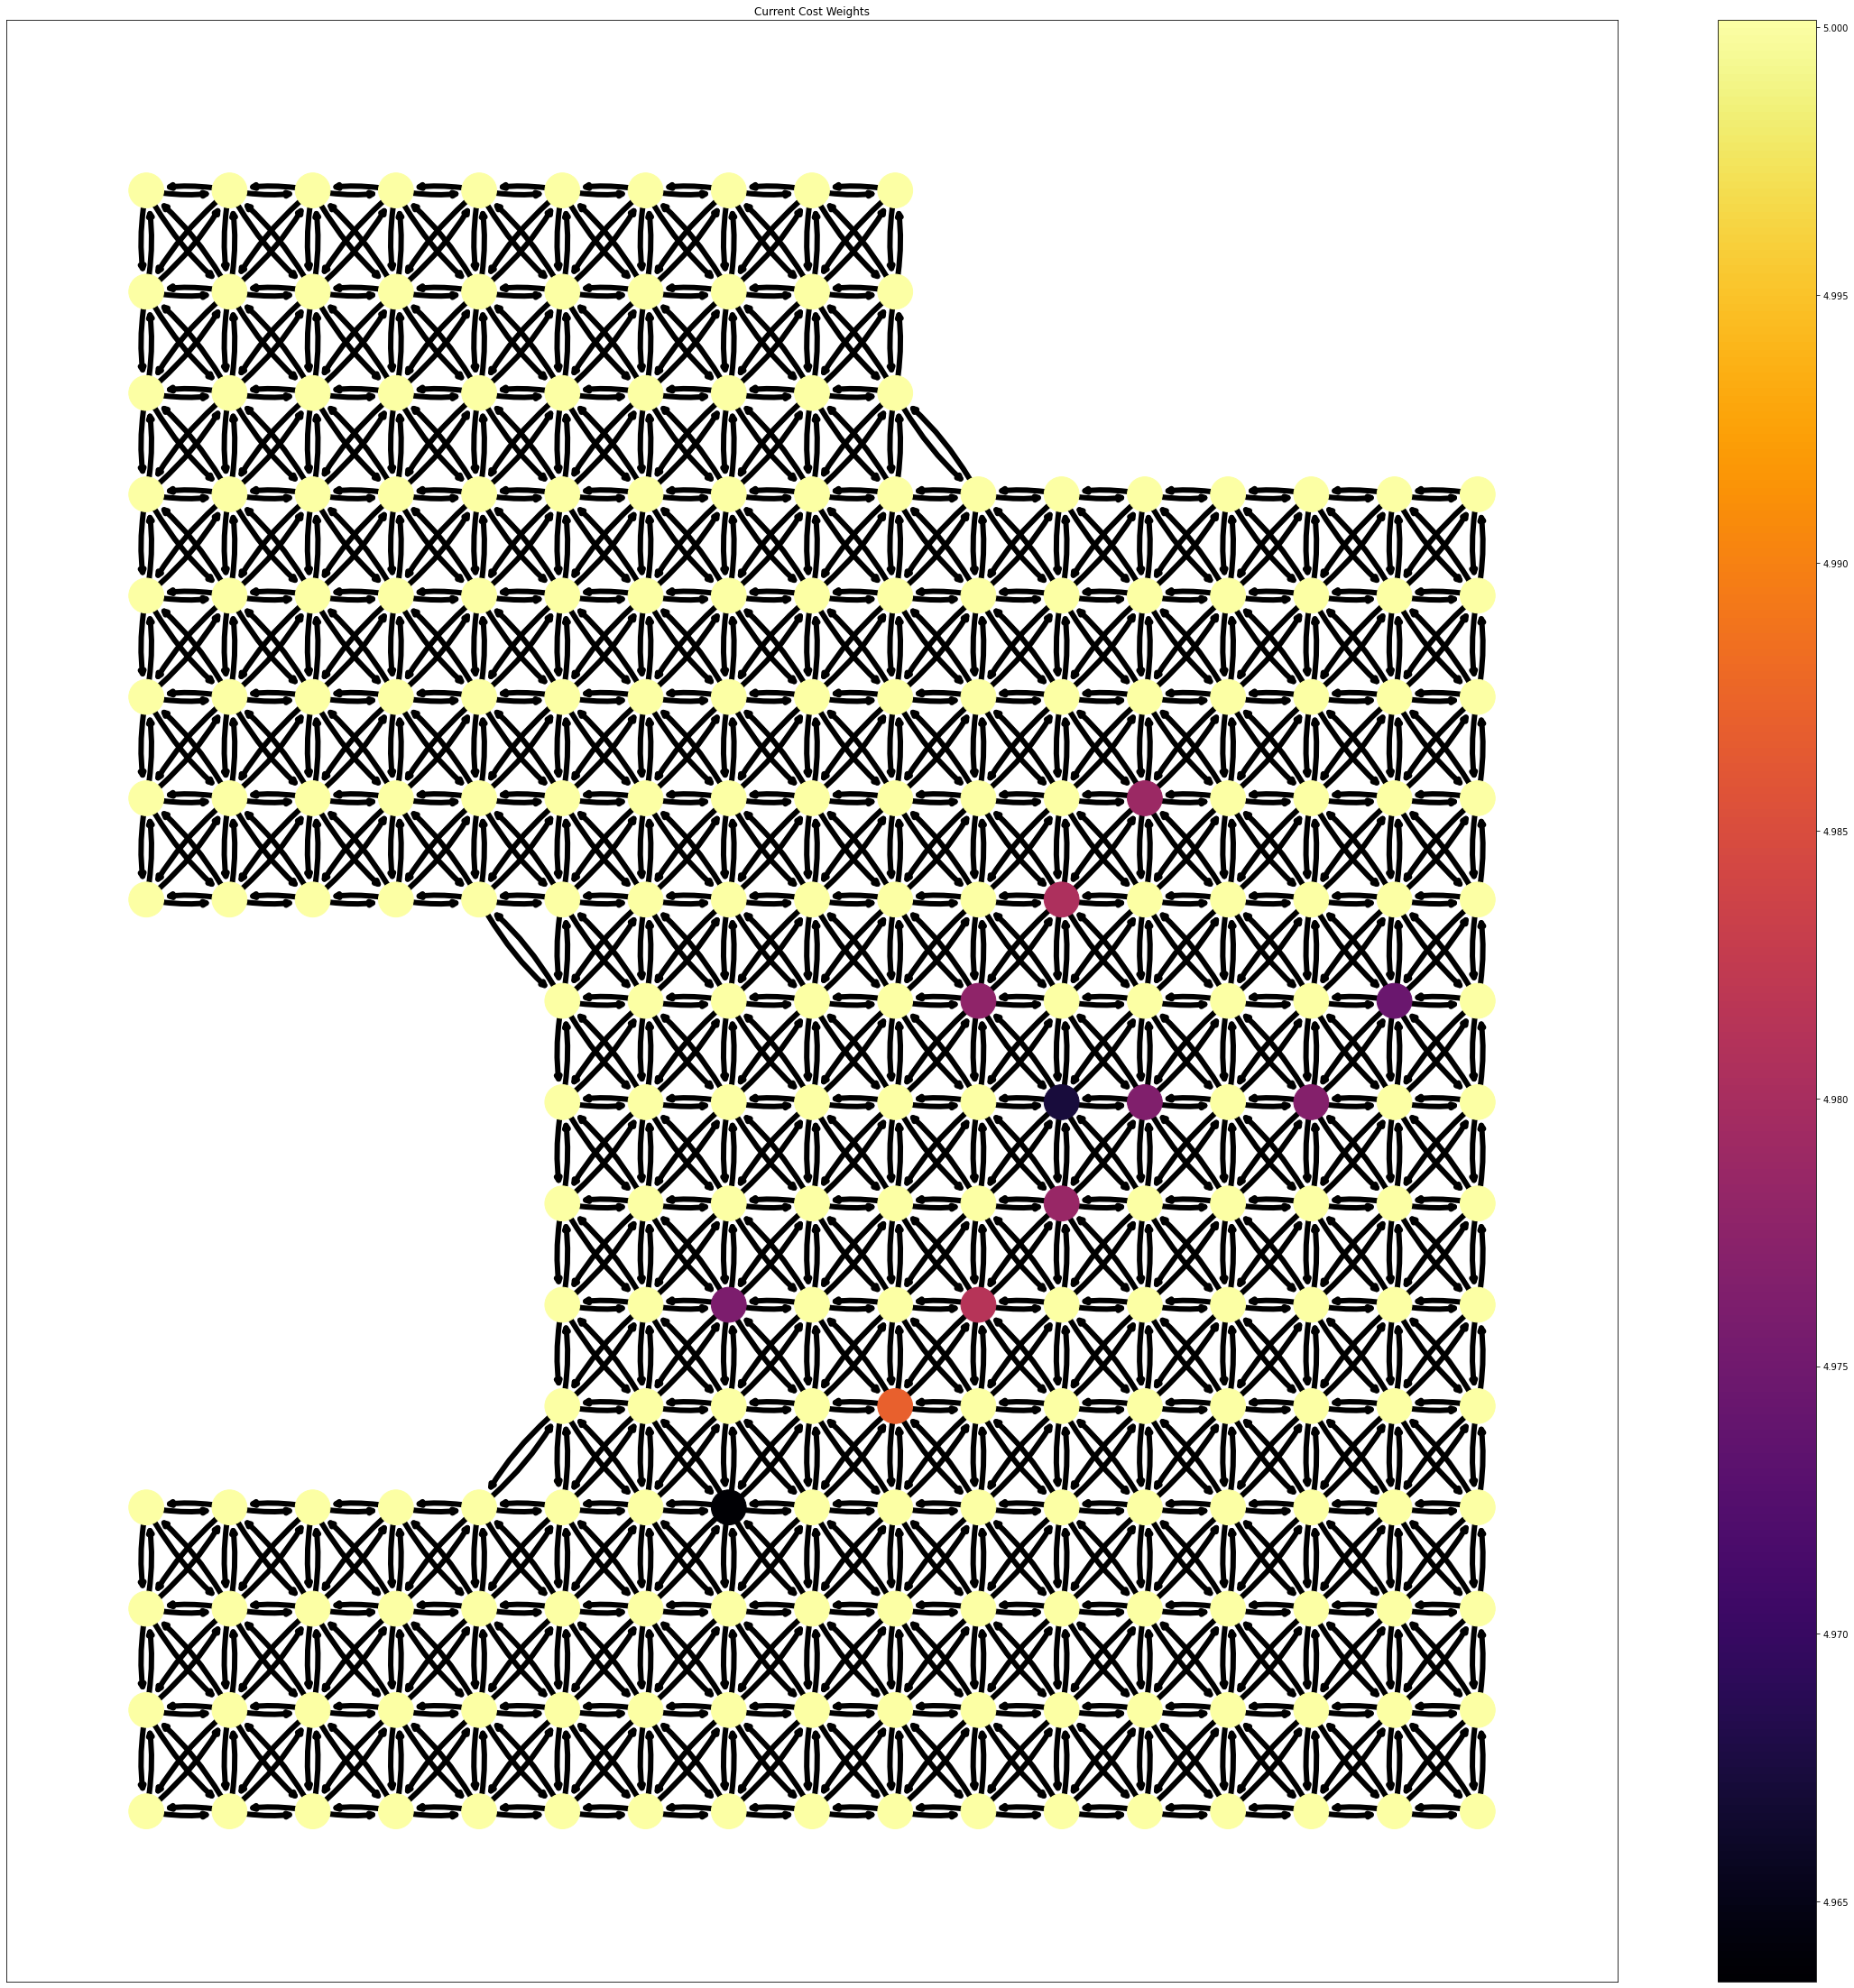

In [158]:
plt.figure(figsize=(40, 40))

nodes = nx.draw_networkx_nodes(
    G, 
    pos,
    node_color=node_colors,
    cmap=cmap,
    vmin=csmin,
    vmax=csmax,
    node_size=1500)
edges = nx.draw_networkx_edges(
    G,
    pos,
    node_size=1500,
    width=6,
    arrowstyle="->",
    connectionstyle='arc3, rad=0.1')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = csmin, vmax=csmax))
sm._A = []
edgebar = plt.colorbar(sm)

plt.title(f"Current Cost Weights")
plt.savefig(f"costmap_current.jpg", dpi=300, bbox_inches='tight')
plt.show()
